<a href="https://colab.research.google.com/github/songhyunsik/kuiotbigdata/blob/main/pythonData/xgboostTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
loan3000 = pd.read_csv('/content/loan3000.csv')
print(loan3000.head())
loan3000.info()

   Unnamed: 0   outcome            purpose_    dti  borrower_score  \
0       32109  paid off  debt_consolidation  21.23            0.40   
1       16982   default         credit_card  15.49            0.40   
2       25335  paid off  debt_consolidation  27.30            0.70   
3       34580  paid off      major_purchase  21.11            0.40   
4       14424   default  debt_consolidation  16.46            0.45   

   payment_inc_ratio  
0            5.11135  
1            5.43165  
2            9.23003  
3            2.33482  
4           12.10320  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3000 non-null   int64  
 1   outcome            3000 non-null   object 
 2   purpose_           3000 non-null   object 
 3   dti                3000 non-null   float64
 4   borrower_score     3000 non-null   float64

In [3]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'
X = loan3000[predictors]
y = outcome

In [4]:
y = pd.Series([1 if out == 'default' else 0 for out in loan3000['outcome']])


In [5]:
from xgboost import XGBClassifier

In [6]:
xgb = XGBClassifier(objective='binary:logistic', subsmaple=0.63, eval_metric='error')


In [7]:
xgb.fit(X, y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:24:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "subsmaple" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
xgb_df= X.copy()
xgb_df['prediction'] = ['default' if out == 1 else 'paid off' for out in xgb.predict(X)]
xgb_df['prob_default'] = xgb.predict_proba(X)[:,0]
xgb_df.head()
from sklearn.metrics import accuracy_score


In [9]:
accuracy_score(y, xgb.predict(X))

0.753

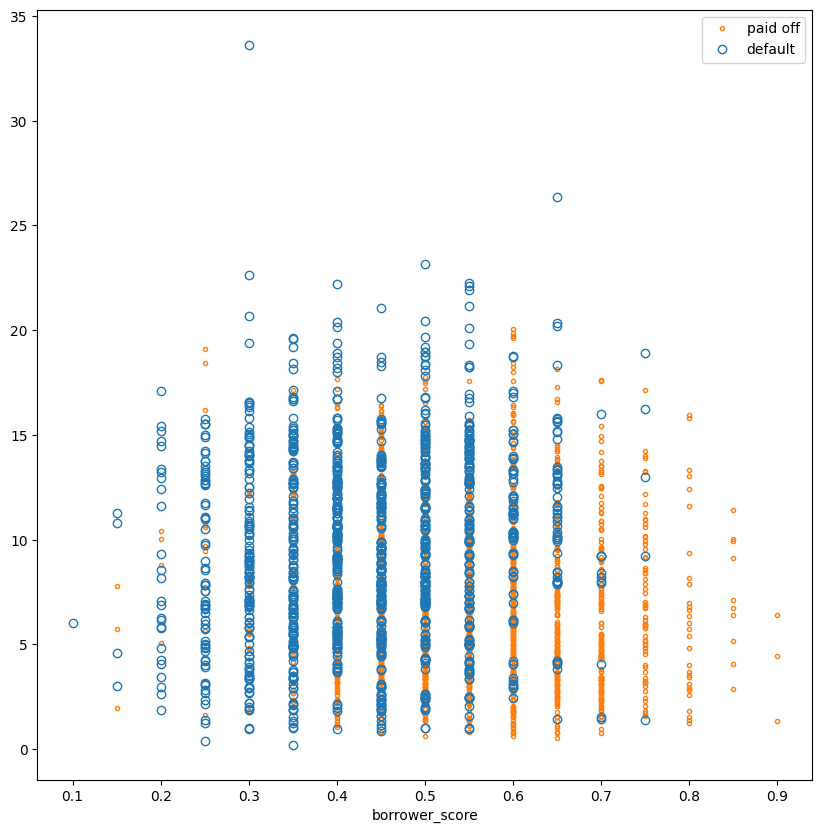

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb_df.loc[xgb_df.prediction == 'paid off'].plot(x='borrower_score', y='payment_inc_ratio', style='.', markerfacecolor='none', markeredgecolor='C1', ax=ax)
xgb_df.loc[xgb_df.prediction == 'default'].plot(x='borrower_score', y='payment_inc_ratio', style='o', markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default'])